<a href="https://colab.research.google.com/github/nurdalilahanan/Data-Science-Project/blob/main/P167239_Project_2_Data_Science_NUR_DALILA_HANAN_BINTI_MIOR_ZULHARMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.0 INTRODUCTION**

Insurance fraud remains to be an enduring issue for the global insurance sector resulting in significant economic losses raising premium costs and a decline in public confidence. In Malaysia, the escalation of motor insurance claims compounded by increased claim complexity and fraudulent activities has driven insurers to enhance their fraud detection capacities. Industry reports and regulatory findings indicate that fraudulent practices including inflated damage claims, fabricated accidents and the misrepresentation of injuries persist in contributing to increased operational expenses and extended claim settlement timelines. Traditional rule-based and manual investigation methods, which are heavily reliant on expert assessment and post-claim audits, frequently require significant resources and may be challenged by the increasing volume and complexity of claims. In this context, data-driven analytical methodologies have gained significance in facilitating immediate and unbiased fraud screening. This research uses an insurance claims dataset acquired from Mendeley Data, encompassing comprehensive information on policyholder demographics, policy attributes, incident details, and claim results, thereby offering an efficient basis for analysing fraud-related patterns within an insurance structure.

The main aim of this research is to establish a hybrid analytical framework that combines association rule mining and classification methods to improve fraud detection and decision-making support in general insurance claims management. This study utilises association rule mining to identify interpretable and actionable patterns indicative of fraud. Simultaneously, predictive classification models are applied to evaluate the probability of fraudulent activity at the individual claim level. By integrating these complementary approaches, the study aims to optimise both interpretability and predictive accuracy, thereby addressing a significant limitation inherent in many individual machine learning models. In the Malaysian insurance industry, this approach is especially necessary as insurers demand transparent and proved analytical tools to ensure regulatory compliance and facilitate operational. The findings of this study seek to provide practical insights for insurers by identifying high-risk claim profiles, enhancing early fraud detection, and facilitating more efficient allocation of investigative resources, thereby underscoring the significance of data science and analytics in addressing real-world insurance challenges.

#**2.0  DATA COLLECTION**

## 2.1 Load Library

In [ ]:
# Basic data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Association Rule Mining
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Set display options
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## 2.2 Data Structure

Link Dataset : https://data.mendeley.com/datasets/992mh7dk9y/2

In [ ]:
#Read Dataset
df = pd.read_csv("/content/drive/MyDrive/insurance_claims.csv")
df.head(20)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


The insurance claims dataset includes a comprehensive set of policyholder, policy, incident, and claim-related information that represent an insurance claim's lifespan. Below is description for each variables:

*   months_as_customer : period of the policyholder's relationship with the insurer
*   age : the insured's age at the time of the incident
*   policy_number
*   policy_bind_date : the date that policy became effective
*   policy_state : the state where the policy was issued
*   policy_csl : combined single limit of liability coverage
*   policy_deductable : the amount payable by the insured from their own funds
*   policy_annual_premium : yearly insurance cost
*   umbrella_limit : additional liability coverage beyond standard policy limits

Socioeconomics background and lifestyle
*   insured_zip
*   insured_sex
*   insured_education_level
*   insured_occupation
*   insured_hobbies
*   insured_relationship

The insured’s reported investment results, which may function as indirect indicators of financial distress.
*   capital-gains
*   capital-loss

Specific incident information offering detailed context regarding the nature, timing, and location of the reported event:
*   incident_date
*   incident_type
*   collision_type
*   incident_severity
*   authorities_contacted
*   incident_state
*   incident_city
*   incident_location
*   incident_hour_of_the_day

Detail the scope of the damage, the sustained injuries, and the supporting evidence related to the event:
*   number_of_vehicles_involved
*   property_damage
*   bodily_injuries
*   witnesses
*   police_report_available

Identify outcome variables that quantify the financial impact of the claim across its various components:
*   total_claim_amount
*   injury_claim
*   property_claim
*   vehicle_claim

Vehicle-related characteristics
*   auto_make
*   auto_model
*   auto_year

Whether a claim was ultimately classified as fraudulent or non-fraudulent.
*   fraud_reported












/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

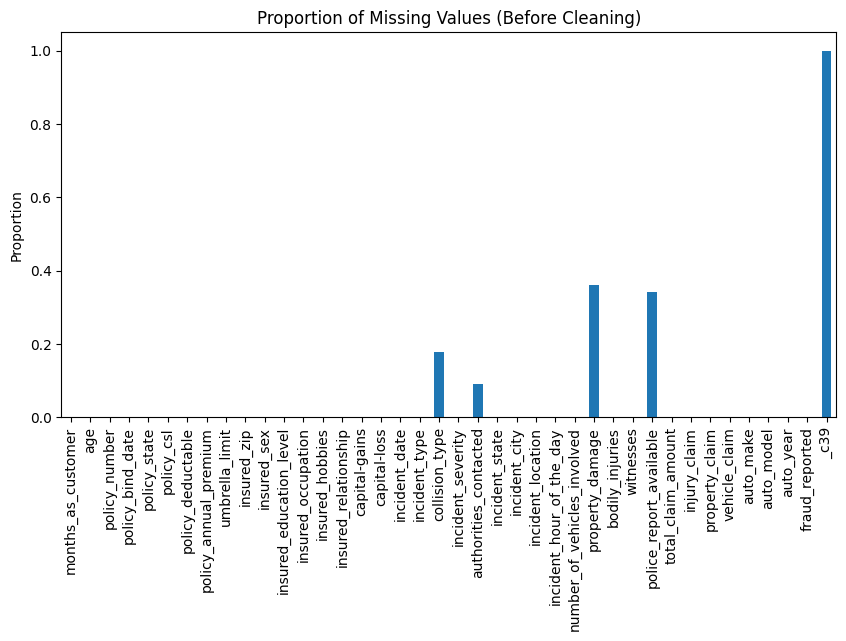

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
df_temp = df.replace("?", np.nan)

plt.figure(figsize=(10,5))
(df_temp.isnull().sum() / len(df_temp)).plot(kind="bar")
plt.title("Proportion of Missing Values (Before Cleaning)")
plt.ylabel("Proportion")
plt.show()

The visualization of the dataset uncovers a diverse pattern of missing data that directly influences th erobustness of the hybrid analytical framework. The variable classified as _c39 is particularly significant as it presents a 100% absent value rate, thereby rendering it statistically insignificant and an obvious option for immediate removal. Other essential variables such as *property_damage*, *police_report_available*, and *collision_type* exhibit remarkable insufficient data. From a domain perspective, these absent values are seldom random. For example, the lack of a police report or specific collision details may unintentionally function as a behavioural indicator of fraud, as claimants may refrain from providing official documentation to conceal inconsistencies (Sagar 2025).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

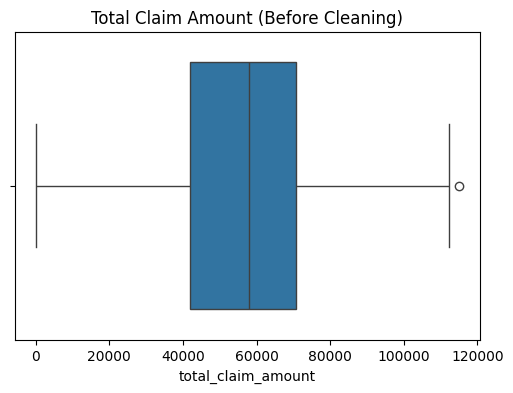

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_claim_amount'])
plt.title("Total Claim Amount (Before Cleaning)")
plt.show()



The boxplot of the *total_claim_amount* variable offers an extensive analysis of the dataset's financial distribution, illustrating a predominantly symmetrical pattern with noticeable outliers. With a median approximately at $58,000, the data indicates a steady trend of claim amounts that correspond with standard industry benchmarks for this portfolio.

However, the identification of a significant outlier surpassing $110,000 serves as a crucial focal point for the fraud detection purpose. Within the insurance industry, such extreme values are seldom merely stochastic fluctuations. It frequently signifies opportunistic fraud in which damages are deliberately overstated to maximise compensation. This visualisation affirms that by strategically addressing these anomalies instead of merely eliminating them, the insurance industry can more effectively differentiate between genuine high-cost incidents and the complex patterns suggestive of fraudulent activity.

## 2.2 Missing Values

In [ ]:
df.info()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
df.describe(include='all')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,909,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,2,7,14,20,6,NaN,NaN,60,4,4,4,4,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,1992-08-05,OH,250/500,NaN,NaN,NaN,NaN,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,2015-02-02,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,1416 Cherokee Ridge,NaN,NaN,?,NaN,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,537,161,93,64,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,NaN,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,NaN,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,NaN,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


The analysis of the dataset structure reveals that the insurance claims data comprises 1,000 observations comprising 40 variables, which include a wide range of policy, demographic, incident, and claim related characteristics. Overall, the dataset exhibits a high degree of completeness, with the majority of variables comprising entirely non-null records, thereby facilitating dependable subsequent analysis. However, a minor extent of missing data is present in certain incident related variables, most notably *authorities_contacted*, as well as variables such as *collision_type*, *property_damage*, and *police_report_available*, where lacking values are indicated by the placeholder symbol "?" or null value. These variables encompass essential contextual and evidentiary information related to claim incidents, and their partial incompleteness may indicate real-world reporting constraints, such as the unavailability of police documentation or provisional damage evaluations at the time of claim submission. The existence of missing values in these fields is especially significant, as they can potentially lead to bias or diminish the interpretability of the model if not properly handled. Simultaneously, the pattern of absent data itself may convey valuable information, particularly in fraud related analyses, where the lack of official reports or damage verification can be indicative of increased risk. Therefore, suitable data preprocessing techniques, such as the transformation or imputation of missing values, are essential to maintain analytical validity and ensure the dataset's representativeness of operational insurance claim contexts (Debener 2023).

# **3.0 DATA CLEANING**

In [ ]:
# Replace '?' with NaN if exists
#df.replace('?', np.nan, inplace=True)
df.drop(columns=['insured_hobbies', '_c39', 'policy_number', 'insured_zip'], inplace=True)

# Replace '?' in collision_type with 'Non-Collision'
df['collision_type'] = df['collision_type'].replace('?', 'Non-Collision')

# Replace null values with 'No Authorities'
df['authorities_contacted'] = df['authorities_contacted'].fillna('No Authorities')

for col in ['property_damage', '"No Authoriti"']:
    mode_value = df[col][df[col] != '?'].mode()[0]
    df[col] = df[col].replace('?', mode_value)

# Encode Target Variable (Fraud)
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

The process of refining the insurance claims dataset includes a systematic data cleaning and preprocessing stage aimed at improving the accuracy and dependability of the subsequent hybrid analytical framework. An essential initial step in this procedure involves the elimination of the variables *insured_hobbies*, *_c39*, and *policy_number*. Although hobbies can provide personal context, they frequently introduce high cardinality noise that does not contribute directly to fraud prediction (Cude 2025). Additionally, *_c39* has been eliminated due to complete missingness, and *policy_number* functions solely as a unique identifier with no statistical relevance for pattern detection. Addressing data inconsistency is equally important, especially when the "?" placeholder conceals significant information.

In the case of *collision_type*, the "?" is replaced with "Non-Collision", a logical modification that ensures the preservation of records involving stationary or single-vehicle incidents. For the *property_damage* and *police_report_available* columns, a mode imputation approach is employed, replacing absent values with the most frequently occurring category to preserve the original distribution's integrity. Furthermore, invalid entries in the authorities related field are converted to "No Authority" to offer a clear and interpretable designation for cases where no official response has been provided. These preprocessing selections guarantee that the association rule mining and classification phases function on a clean, semantically coherent dataset, thereby minimising the likelihood of "garbage-in, garbage-out" results in fraud detection (LI 2024).

In [ ]:
df.head(20)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,2015-01-21,Vehicle Theft,Non-Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Non-Collision,Minor Damage,No Authorities,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
5,256,39,2006-10-12,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,1
6,137,34,2000-06-04,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,NO,0,0,NO,78650,21450,7150,50050,Nissan,Pathfinder,2012,0
7,165,37,1990-02-03,IL,100/300,1000,1137.03,0,MALE,Associate,tech-support,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,NO,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,0
8,27,33,1997-02-05,IL,100/300,500,1442.99,0,FEMALE,PhD,other-service,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,0
9,212,42,2011-07-25,IL,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,NO,42300,4700,4700,32900,Saab,92x,1996,0


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
df.describe(include='all')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,951,3,3,NaN,NaN,NaN,2,7,14,6,NaN,NaN,60,4,4,4,5,7,7,1000,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,14,39,NaN,NaN
top,NaN,NaN,1992-08-05,OH,250/500,NaN,NaN,NaN,FEMALE,JD,machine-op-inspct,own-child,NaN,NaN,2015-02-02,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,1416 Cherokee Ridge,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,NaN,NaN,Saab,RAM,NaN,NaN
freq,NaN,NaN,3,352,351,NaN,NaN,NaN,537,161,93,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,698,NaN,NaN,686,NaN,NaN,NaN,NaN,80,43,NaN,NaN
mean,203.954000,38.948000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,0.247000
std,115.113174,9.140287,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,0.431483
min,0.000000,19.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,0.000000
25%,115.750000,32.000000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,0.000000
50%,199.500000,38.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,0.000000
75%,276.250000,44.000000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,0.000000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

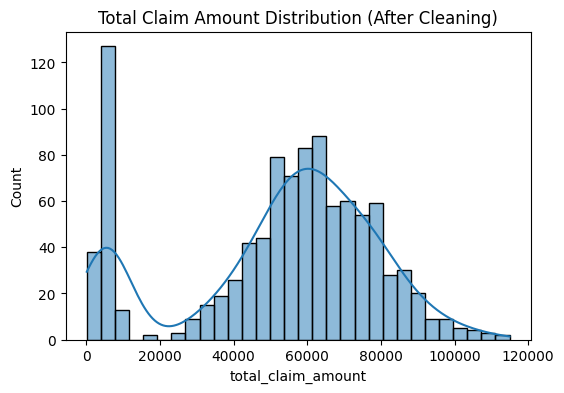

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['total_claim_amount'], bins=30, kde=True)
plt.title("Total Claim Amount Distribution (After Cleaning)")
plt.show()


The visualisation of the *total_claim_amount* distribution exhibits a complex, bimodal pattern that provides significant insights into the behaviour of insurance claimants. The primary peak, situated between $50,000 and $80,000 indicates the typical density of valid claims, while a secondary, lesser peak at the lower end of the spectrum implies a concentration of minor incidents or possibly "car accident" claims. This bimodal characteristic is important for a hybrid analytical framework, as it suggests that fraud patterns may present variably depending on the strength of the claims. Although the distribution appears generally normal within its main cluster, the continued presence of claims approaching the $115,000 threshold, as indicated in the outlier analysis, remains significant for anomaly detection. In the context of fraud analytics, these high-value data elements are frequently regarded as high-leverage observations capable of substantially impacting classification boundaries. By retaining the inherent variability of this distribution rather than over-smoothing, the study guarantees that both Association Rule Mining and Classification models can accurately identify the complex correlation between claim size and fraudulent intention, as extreme claim amounts are often a key driver of fraudulent reporting.


# **4.0 ASSOCIATION RULE MINING (FRAUD PATTERN RECOVERY)**

##4.1 Select Variables for Rules

In [ ]:
arm_df = df[
    ['incident_type',
     'collision_type',
     'incident_severity',
     'number_of_vehicles_involved',
     'police_report_available',
     'property_damage',
     'fraud_reported']
]


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

The selection of variables for association rule mining in this study was guided by the goal of identifying interpretable and practically significant fraud patterns within insurance claims data. Variables associated with incident characteristics including incident type, collision type, incident severity, and the number of vehicles involved were prioritised as previous research indicates that fraudulent claims frequently display unique accident patterns, such as single-vehicle incidents or claims involving significant reported damage. Furthermore, evidence and reporting indicators such as the availability of police reports and property damage were incorporated to measure the extent of external verification supporting a claim, an important factor in fraud evaluation. The lack or inconsistency of such evidence has been broadly linked to an increased likelihood of fraud especially in cases involving opportunistic and overstated claims (Griffin & Maturana 2013). The binary outcome variable fraud_reported was included as the dependent variable to ensure that the extracted rules explicitly associate specific claim conditions with fraudulent outcomes, thereby improving interpretability and decision-making relevance. Overall, the selected variables correspond with the strengths of association rule mining in detecting co-occurrence patterns among categorical attributes, while also accurately representing real-world insurance investigation procedures, thereby making the resulting rules appropriate for early fraud detection and decision-making support.

## 4.2 Convert to Transaction Format

In [ ]:
transactions = []

for _, row in arm_df.iterrows():
    transaction = []
    for col in arm_df.columns:
        transaction.append(f"{col}={row[col]}")
    transactions.append(transaction)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

##4.3 Apply Apriori Algorithm

In [ ]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
trans_df = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(
    trans_df,
    min_support=0.05,
    use_colnames=True
)

frequent_itemsets.sort_values(by='support', ascending=False).head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,support,itemsets
4,0.753,(fraud_reported=0)
18,0.698,(property_damage=NO)
16,0.686,(police_report_available=NO)
14,0.581,(number_of_vehicles_involved=1)
81,0.529,"(property_damage=NO, fraud_reported=0)"


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

##4.4 Generate Association Rule

In [ ]:
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1.2
)

# Focus only on fraud-related rules
fraud_rules = rules[
    rules['consequents'].astype(str).str.contains('fraud_reported=1')
]

fraud_rules.sort_values(by='confidence', ascending=False).head(10)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
232,"(incident_severity=Major Damage, collision_typ...",(fraud_reported=1),0.096,0.247,0.061,0.635417,2.572537,1.0,0.037288,2.065371,0.676193,0.216312,0.515826,0.441190
468,"(property_damage=YES, incident_severity=Major ...",(fraud_reported=1),0.087,0.247,0.055,0.632184,2.559449,1.0,0.033511,2.047219,0.667350,0.197133,0.511532,0.427428
67,"(incident_severity=Major Damage, collision_typ...",(fraud_reported=1),0.084,0.247,0.053,0.630952,2.554463,1.0,0.032252,2.040387,0.664332,0.190647,0.509897,0.422764
452,"(incident_severity=Major Damage, number_of_veh...",(fraud_reported=1),0.132,0.247,0.083,0.628788,2.545700,1.0,0.050396,2.028490,0.699517,0.280405,0.507022,0.482410
448,"(incident_severity=Major Damage, incident_type...",(fraud_reported=1),0.132,0.247,0.083,0.628788,2.545700,1.0,0.050396,2.028490,0.699517,0.280405,0.507022,0.482410
1613,"(incident_severity=Major Damage, number_of_veh...","(incident_type=Single Vehicle Collision, fraud...",0.132,0.117,0.083,0.628788,5.374255,1.0,0.067556,2.378694,0.937705,0.500000,0.579601,0.669095
1612,"(incident_severity=Major Damage, incident_type...","(fraud_reported=1, number_of_vehicles_involved=1)",0.132,0.133,0.083,0.628788,4.727728,1.0,0.065444,2.335592,0.908389,0.456044,0.571843,0.626424
1607,"(incident_severity=Major Damage, incident_type...",(fraud_reported=1),0.132,0.247,0.083,0.628788,2.545700,1.0,0.050396,2.028490,0.699517,0.280405,0.507022,0.482410
1583,"(incident_type=Multi-vehicle Collision, police...",(fraud_reported=1),0.105,0.247,0.064,0.609524,2.467708,1.0,0.038065,1.928415,0.664543,0.222222,0.481439,0.434317
2955,"(property_damage=NO, incident_severity=Major D...","(fraud_reported=1, incident_type=Single Vehicl...",0.087,0.117,0.053,0.609195,5.206798,1.0,0.042821,2.259441,0.884933,0.350993,0.557413,0.531093


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


The results of the association rule mining analysis demonstrate several robust and interpretable patterns correlating claim attributes with fraudulent results. Analysis of the extracted rules reveals that combinations of factors including high incident severity, single-vehicle collisions, limited vehicle involvement and the absence or limited availability of formal reports are consistently and strongly correlated with fraudulent activity.

For example, rules with antecedents including *incident_majority* = Major Damage and *incident_type* = Single Vehicle Collision exhibit confidence values surpassing 0.60, signifying that over 60% of claims meeting these criteria were classified as fraudulent. The lift values which range from approximately 2.45 to as high as 5.37 indicate that the probability of falsehood under these conditions is between two and five times greater than the baseline fraud rate within the dataset emphasising the non random and significant nature of these correlations.

Furthermore, the relatively high support values for several principles suggest that these patterns are not only robust but also occur with adequate frequency to be of practical significance. Additional measures including leverage and conviction further affirm the robustness of these principles indicating significant deviation from independence and a strong directional influence from the antecedents to fraudulent outcomes.

Metrics including Zhang's metric, Jaccard similarity and the Kulczynski index offer additional support for the significant relationships between antecedent itemsets and fraudulent activity indicating consistent and stable associations rather than coincidental correlations. Overall, these findings suggest that claims involving significant damage in single vehicle incidents represent a high risk profile for fraudulent activity and can serve as actionable, interpretable indicators to facilitate early fraud detection and prioritisation within insurance claim investigation procedures.

##4.5 Visualize Rules (Support vs Confidence)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

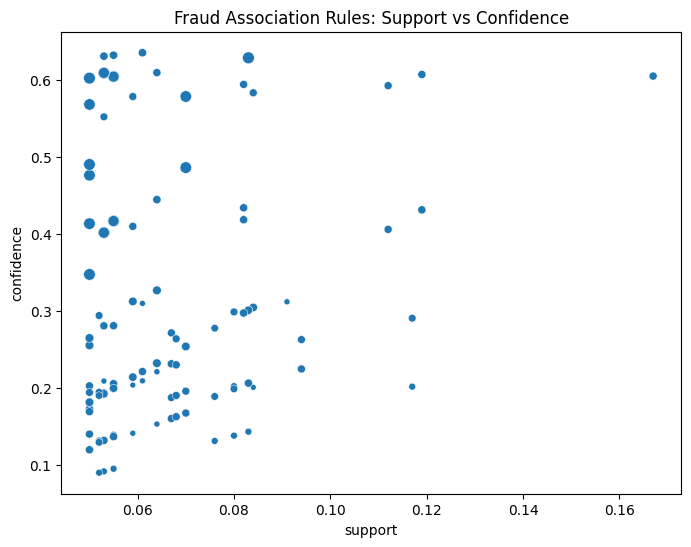

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=fraud_rules,
    x='support',
    y='confidence',
    size='lift',
    legend=False
)
plt.title("Fraud Association Rules: Support vs Confidence")
plt.show()


The scatterplot illustrating confidence versus support offers a comprehensive visual evaluation of the intensity and prevalence of the fraud related association rules identified within this study. Each point signifies a rule with support denoting the frequency of the rule within the dataset and confidence representing the conditional probability of fraud given the antecedent conditions. The visualisation indicates that the majority of rules are concentrated within the low to moderate support range implying that fraudulent patterns frequently emerge from particular combinations of claim features rather than from highly prevalent scenarios. Simultaneously, a subset of rules demonstrates relatively high confidence levels which exceeding 0.6 signifying that under specific conditions the probability of fraud is significantly increased. Additionally, the scatterplot underscores an inverse relationship between support and confidence as rules exhibiting exceptionally high confidence commonly possess lower support levels indicating robust yet specialised fraud patterns whereas rules with greater support typically demonstrate confidence representing more prevalent but less conclusive indicators of fraudulent activity. In summary, the visualisation supports the study's goal of aligning interpretability with practical application thereby allowing insurers to recognise rules that are both statistically significant and operationally beneficial for prioritising claim investigations based on the combined factors of frequency and risk severity.

# **5.0 FRAUD CLASSIFICATION (PREDICTIVE MODELLING)**

##5.1 Encode Categorical Variables

In [ ]:
df_model = df.copy()

label_encoders = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

##5.2 Feature Selection

In [ ]:
X = df_model.drop(columns=['fraud_reported'])
y = df_model['fraud_reported']

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

##5.3 Decision Tree Model

In [ ]:
dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       226
           1       0.51      0.42      0.46        74

    accuracy                           0.76       300
   macro avg       0.66      0.64      0.65       300
weighted avg       0.74      0.76      0.75       300



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

The performance results of the decision tree model demonstrate a moderate degree of effectiveness in classifying insurance claims, with an overall accuracy of 76%, indicating that the model can accurately differentiate between fraudulent and non-fraudulent claims in most instances. The model presents enhanced predictive performance for non-fraudulent claims (class 0), as evidenced by a precision of 0.82 and a recall of 0.87, suggesting that legitimate claims are accurately detected with a comparatively low rate of fraudulent claims. In contrast, the model's effectiveness in identifying fraudulent claims (class 1) is relatively limited with a precision of 0.51 and a recall of 0.42. This indicates that although approximately half of the claims identified as fraudulent are genuine cases, a significant number of actual fraudulent claims remain undetected. This difference in performance is further evidenced by the reduced F1-score for the fraud class underscoring the fundamental difficulty of fraud detection in insurance datasets where fraudulent instances are generally uncommon and frequently share overlapping features with legitimate claims. From an insurance analytics standpoint, such outcomes are predicted as decision tree models generally focus on maximising accuracy for the majority class unless specifically modified to account for cost sensitivity or class imbalance. Despite this, the model offers significant interpretability by demonstrating decision rules related to potentially fraudulent claim characteristics, which makes it appropriate as an initial screening or explanatory instrument. These findings align with existing literature that highlights the relationship between interpretability and fraud sensitivity in tree-based models and highlights the importance of employing complementary methods or hybrid frameworks to improve fraud detection effectiveness in practical insurance settings.

##5.4 Random Forest Model

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Random Forest Results:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       226
           1       0.59      0.22      0.32        74

    accuracy                           0.77       300
   macro avg       0.69      0.58      0.59       300
weighted avg       0.74      0.77      0.73       300



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

The random forest model exhibits an overall classification accuracy of 77%, reflecting an efficient capacity to distinguish between fraudulent and non-fraudulent insurance claims. The model demonstrates significant effectiveness in detecting legitimate claims (class 0), attaining a high recall of 0.95, which indicates that the majority of non-fraudulent claims are accurately identified and infrequently misclassified as fraudulent. This strong performance offers operational advantages by enabling insurers to prevent unjustified investigations and sustain efficient claims management. However, the model demonstrates restricted sensitivity in identifying fraudulent claims (class 1), as evidenced by a low recall of 0.22 and an associated F1-score of 0.32. This suggests that although the precision for fraud detection is moderate at 0.59, indicating that over half of the identified fraud cases are correct, a significant number of genuine fraudulent claims remain undetected. This pattern aligns with the typical challenges encountered in insurance fraud analytics, where fraudulent cases are scarce and often closely resemble legitimate claims, thereby complicating their identification even when employing ensemble methods (Vosseler 2022). Although its interpretability is diminished relative to a single decision tree, the random forest model offers enhanced robustness and generalisation by aggregating multiple trees, a method extensively documented in the literature as an effective strategy for managing complex, nonlinear relationships in fraud detection. Overall, these findings indicate that while the random forest model functions effectively as a conservative screening mechanism for authentic claim approval, it may benefit from enhancements such as cost-sensitive learning or integration with rule-based methods to increase fraud detection rates in real-world insurance settings.

##5.5 Confusion Matrix Visualization

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

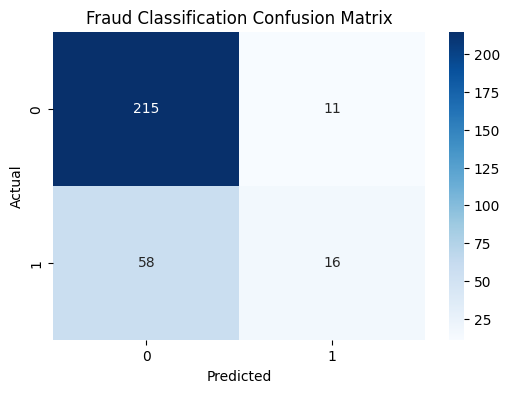

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Fraud Classification Confusion Matrix")
plt.show()


The confusion matrix for the fraud classification model offers an essential analysis of the hybrid framework’s effectiveness in differentiating between legitimate and fraudulent insurance claims. The visualisation indicates a substantial number of True Negatives which is 215 demonstrating the model's strong capability to accurately identify legitimate claims and reduce unwarranted investigations of honest policyholders. However, the occurrence of 58 false negative cases, in which actual fraud was misclassified as legitimate, underscores the basic challenge within the insurance industry, where fraudulent activities can frequently be overlooked beneath typical claim patterns. Conversely, the 16 True Positives denote accurately identified cases of fraud, while the 11 False Positives reflect a comparatively low incidence of scams, which is crucial for preserving customer trust and ensuring operational effectiveness. In the context of a hybrid study, these findings indicate that although classification offers a robust foundation, the incorporation of Association Rule Mining is essential to identify the subtle, infrequent patterns responsible for overlooked fraudulent cases, as insurance fraud frequently presents a "needle in a haystack" challenge that demands multi-layered detection approaches.

#**6.0 Business Insight**

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

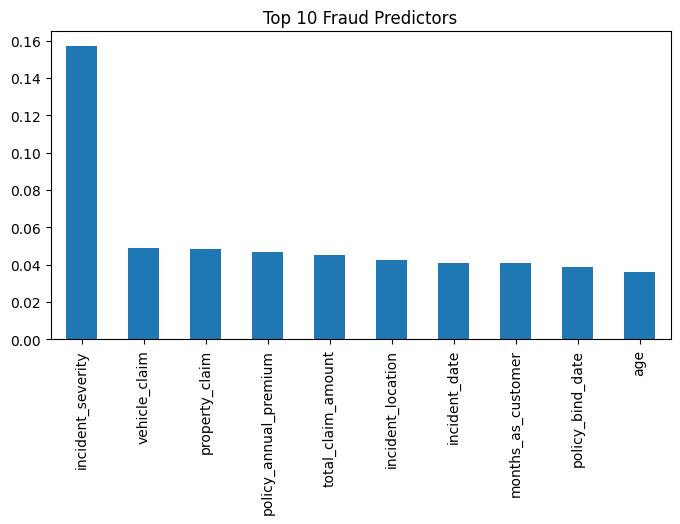

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Fraud Predictors")
plt.show()


The visualisation of the top 10 fraud predictors underscores the principal variables that most significantly influence the prediction of fraudulent insurance claims in this analysis. Among all predictors, *incident_severity* emerges as the most significant factor, indicating that claims involving significant or severe harm are more likely to be associated with fraudulent activity. This observation corresponds with well-established insurance fraud theory, which frequently involves overstatement of damage severity to justify larger claim amounts. Financial variables such as *vehicle_claim*, *property_claim*, *total_claim_amount*, and *policy_annual_premium* are also significantly featured, suggesting that fraudulent activity is strongly associated with the financial worth of claims and the policy's cost structure. Higher claim components may indicate misrepresentation or opportunistic actions, especially when multiple claim categories are present. Temporal and contextual variables, such as *incident_date*, *policy_bind_date*, and *months_as_customer*, indicate that timing is a significant factor. For instance, claims submitted briefly after the policy's commencement could raise suspicion, a pattern frequently examined in fraud detection literature. Furthermore, demographic and geographic variables such as *age* and *incident_location* serve as indicators of behavioural and environmental risk factors, as specific age groups or locations may demonstrate unique claim patterns. Overall, this visualisation offers a clear and intuitive summary of how both claim attributes and policyholder characteristics interact to impact fraud risk, reinforcing the study’s goal of integrating data-driven insights with domain expertise to enhance insurance fraud detection.

# **7.0 CONCLUSIONS**

This research employed a hybrid analytical framework integrating Association Rule Mining with supervised classification models to investigate and identify fraudulent insurance claims utilising a real-world insurance dataset. Through the application of Association Rule Mining, the study effectively identified significant patterns connecting claim attributes such as incident severity, collision type, number of vehicles involved, and police report availability to fraudulent outcomes. The extracted rules exhibited high confidence and lift metrics, suggesting that specific combinations of claim attributes significantly elevate the probability of fraud. These findings underscore the significance of Association Rule Mining as both an exploratory and explanatory technique, especially within insurance industries where comprehending the reasons behind a claim's suspicion is as crucial as forecasting its potential fraudulent nature. By showing transparent and interpretable patterns, the rule-based analysis enhances predictive models and aids in early-stage fraud detection.

During the classification stage, both the Decision Tree and Random Forest models demonstrated satisfactory overall accuracy, exhibiting superior performance in the detection of non-fraudulent claims compared to fraudulent ones. This disparity aligns with a prevalent challenge in insurance fraud detection, caused by class imbalance and the nuanced characteristics of fraudulent activities. The Decision Tree model demonstrated straightforward interpretability and insight into decision pathways whereas the Random Forest model delivered enhanced robustness and generalisation through ensemble learning along with decreased recall for fraud cases. These findings collectively underscore the fundamental imbalance between interpretability and predictive accuracy within the domain of fraud analytics. From an industry standpoint, the findings indicate that insurers may gain advantages from a hybrid methodology in which association rules inform interpretable risk indicators and machine learning models facilitate scalable fraud detection. Such integration can assist insurers in prioritising investigations, minimising financial losses, and enhancing operational efficiency. Ultimately, this study illustrates how data-driven methodologies can facilitate more informed and proactive fraud management strategies within the insurance sector especially when integrated with domain expertise and practical limitations.



# **REFERENCES**

AQQAD, ABDELRAHIM (2023), “insurance_claims ”, Mendeley Data, V2, doi: 10.17632/992mh7dk9y.2

Sagar, A. (2025). Insurance Fraud Detection Using Machine Learning. International Journal for Research in Applied Science and Engineering Technology. https://doi.org/10.22214/ijraset.2025.73264.

Debener, J., Heinke, V., & Kriebel, J. (2023). Detecting insurance fraud using supervised and unsupervised machine learning. Journal of Risk and Insurance. https://doi.org/10.1111/jori.12427.

Cude, B., & Zhang, H. (2025). Factors That Influence Willingness to Commit Insurance Fraud. Journal of Consumer Affairs. https://doi.org/10.1111/joca.70015.

Li, T., Liu, F., Chen, X., & , C. (2024). Web log mining techniques to optimize Apriori association rule algorithm in sports data information management. Scientific Reports, 14. https://doi.org/10.1038/s41598-024-74427-z.

Hunyadi, I., Constantinescu, N., & Ticleanu, O. (2025). Efficient Discovery of Association Rules in E-Commerce: Comparing Candidate Generation and Pattern Growth Techniques. Applied Sciences. https://doi.org/10.3390/app15105498.

Griffin, J., & Maturana, G. (2016). Who Facilitated Misreporting in Securitized Loans. Review of Financial Studies, 29, 384-419. https://doi.org/10.1093/rfs/hhv130.

Vosseler, A. (2022). Unsupervised Insurance Fraud Prediction Based on Anomaly Detector Ensembles. Risks, 10(7), 132. https://doi.org/10.3390/risks10070132